In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ex2fun

path = 'ex2data1.txt'
data = pd.read_csv(path,names = ['ex1','ex2','ad'])

data.head()



,ex1,ex2,ad
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
positive = data[data['ad'] == 1]
negative = data[data['ad'] == 0]

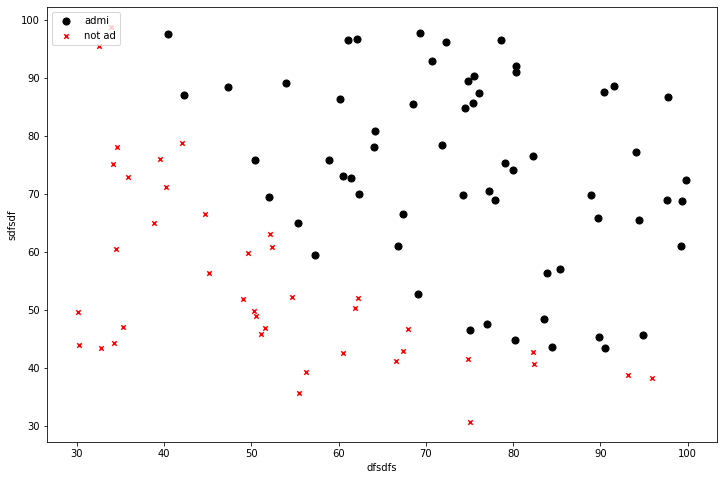

In [3]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['ex1'],positive['ex2'],s = 50,c = 'k',marker='o',label = 'admi')
ax.scatter(negative['ex1'],negative['ex2'],s = 20,c = 'r',marker = 'x',label = 'not ad')
ax.legend(loc = 2)
ax.set_xlabel("dfsdfs")
ax.set_ylabel("sdfsdf")
plt.show()

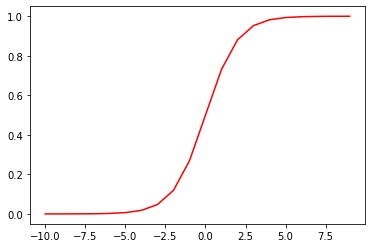

In [4]:
nums = np.arange(-10,10,step = 1)
sig = ex2fun.sigmoid(nums)
plt.plot(nums,sig,'r')
plt.show()

In [5]:
data.insert(0,'ones',1)

clos = data.shape[1]
x = data.iloc[:,0:clos-1]
y = data.iloc[:,clos-1:clos]

theta = np.zeros(x.shape[1])

print(x.shape,y.shape,theta.shape)



(100, 3) (100, 1) (3,)


In [6]:
ex2fun.cost(theta, x, y)

0.6931471805599457

In [7]:
ex2fun.gradient(theta, x, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [8]:
import scipy.optimize as opt

result = opt.fmin_tnc(func = ex2fun.cost, x0 = theta, fprime=ex2fun.gradient, args = (x,y))

result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [9]:
ex2fun.cost(result[0], x, y)

0.20349770158947458

In [10]:
theta_min = np.matrix(result[0])
predictions = ex2fun.predict(theta_min,x)
corr = np.zeros(predictions.shape)
corr[y == predictions] = 1
acc = sum(corr)/len(corr)*100
print("{0}".format(acc))

[89.]


In [11]:
path =  'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


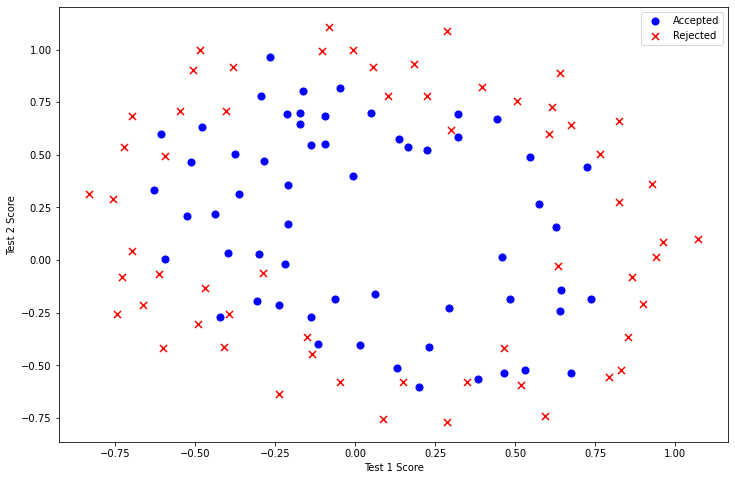

In [12]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [13]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3,'ones',1)


In [14]:
data2.head()

,Test 1,Test 2,Accepted,ones
0,0.051267,0.69956,1,1
1,-0.092742,0.68494,1,1
2,-0.213710,0.69225,1,1
3,-0.375000,0.50219,1,1
4,-0.513250,0.46564,1,1


In [15]:
for i in range(1,degree):
    for j in range(0,i):
        data2[str(i) + str(j)] = np.power(x1,i-j)*np.power(x2,j)

data2.drop('Test 1',axis = 1, inplace=True)
data2.drop('Test 2',axis = 1, inplace=True)
data2.head()

,Accepted,ones,10,20,21,30,31,32,40,41,42,43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [16]:
cols = data2.shape[1]
x2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

theta2 = np.zeros(11)
theta2.shape

(11,)

In [17]:
x2.shape,y2.shape,theta2.shape

((118, 11), (118, 1), (11,))

In [18]:
rate = 1
ex2fun.cost(theta2,x2,y2,rate)

0.6931471805599451

In [19]:
ex2fun.cost(theta2,x2,y2)

0.6931471805599451

In [20]:
ex2fun.gradient(theta2, x2, y2, rate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [21]:
theta2 = ex2fun.dec(theta2,x2,y2,rate)
theta2

array([ 0.52999633,  0.29066404, -1.6092845 , -0.57976106,  0.01650026,
       -0.21528845, -0.39862215, -1.36880872,  0.02117418, -0.94232581,
        0.0308356 ])

In [22]:
result2 = opt.fmin_tnc(func=ex2fun.cost, x0=theta2, fprime=ex2fun.gradient, args=(x2, y2, rate))
result2

(array([ 0.53009599,  0.29074987, -1.60724325, -0.58212969,  0.01782717,
        -0.21330513, -0.40025502, -1.37142602,  0.02266625, -0.95035373,
         0.03438467]),
 13,
 1)

In [27]:
theta_min = np.matrix(result2[0])
predictions = ex2fun.predict(theta_min, x2)
corr = np.zeros(predictions.shape)
corr[y2 == predictions] = 1
acc = sum(corr)/len(corr)*100
print("{0}".format(acc))

[66.10169492]
